In [2]:
import pandas as pd
import json
import os 
import requests
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
df=pd.read_csv('proposal_data.csv')

proposals with each goovernance id 

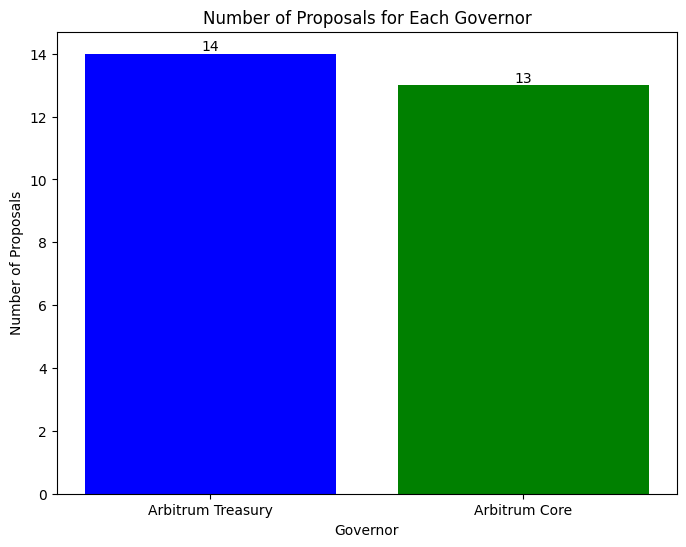

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('proposal_data.csv')

# Group proposal IDs based on governance ID and count the number of proposals
grouped_data = df.groupby('governance_id')['id'].count().reset_index(name='proposal_count')

# Rename governors based on governance IDs
grouped_data['Governor'] = grouped_data['governance_id'].map({
    'eip155:42161:0x789fc99093b09ad01c34dc7251d0c89ce743e5a4': 'Arbitrum Treasury',
    'eip155:42161:0xf07ded9dc292157749b6fd268e37df6ea38395b9': 'Arbitrum Core'
})

# Plot the number of proposals for each governor
plt.figure(figsize=(8, 6))
bars = plt.bar(grouped_data['Governor'], grouped_data['proposal_count'], color=['blue', 'green'])
plt.xlabel('Governor')
plt.ylabel('Number of Proposals')
plt.title('Number of Proposals for Each Governor')
plt.xticks(rotation=0)

# Add exact numbers above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()


Results of each proposal

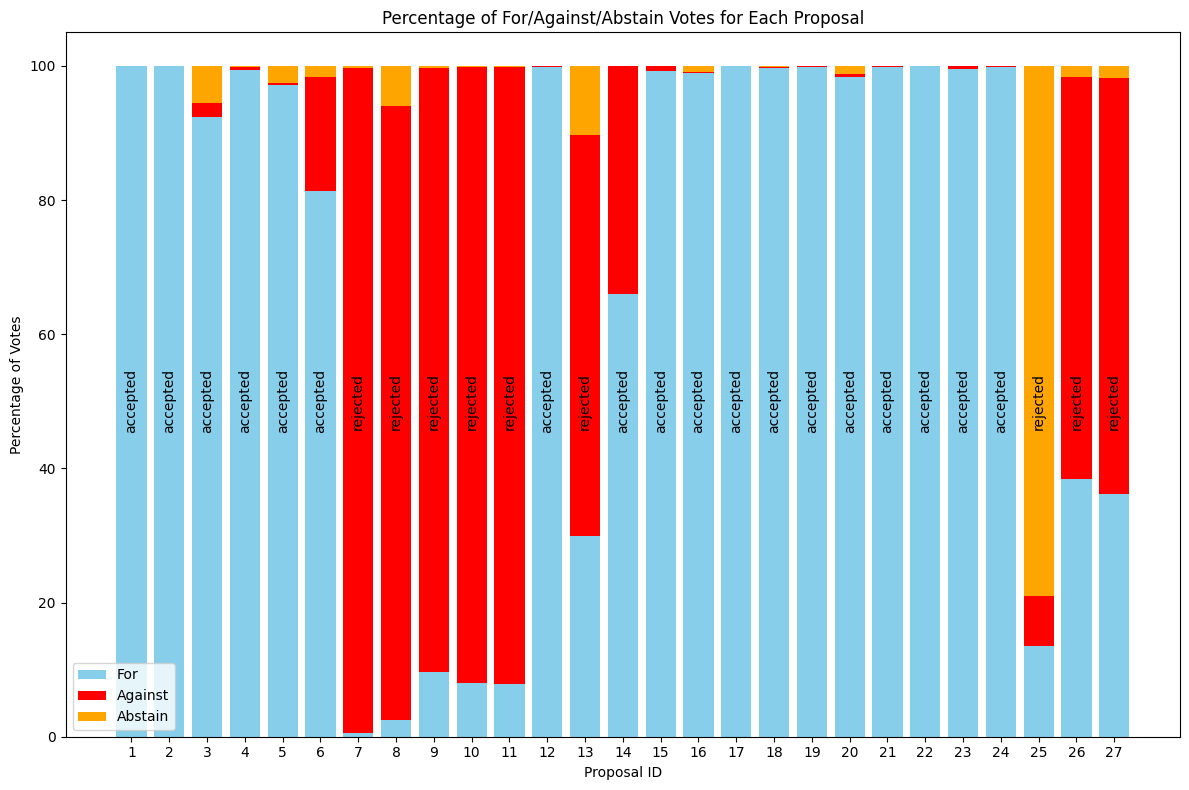

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("proposal_data.csv")

# Add an index column starting from 1
df.insert(0, 'index', range(1, len(df) + 1))

# Calculate the total votes for each proposal
df['total_votes'] = df['for_weight'] + df['against_weight'] + df['abstain_weight']

# Calculate the percentage of votes for each category
df['for_percentage'] = (df['for_weight'] / df['total_votes']) * 100
df['against_percentage'] = (df['against_weight'] / df['total_votes']) * 100
df['abstain_percentage'] = (df['abstain_weight'] / df['total_votes']) * 100

# Normalize the percentages to ensure the height of each bar remains the same
df['total_percentage'] = 100  # Set the total percentage to 100 for normalization
df['for_percentage'] *= df['total_percentage'] / (df['for_percentage'] + df['against_percentage'] + df['abstain_percentage'])
df['against_percentage'] *= df['total_percentage'] / (df['for_percentage'] + df['against_percentage'] + df['abstain_percentage'])
df['abstain_percentage'] *= df['total_percentage'] / (df['for_percentage'] + df['against_percentage'] + df['abstain_percentage'])

# Plot the stacked bar graph
plt.figure(figsize=(12, 8))
plt.bar(df['index'], df['for_percentage'], color='skyblue', label='For')
plt.bar(df['index'], df['against_percentage'], bottom=df['for_percentage'], color='red', label='Against')
plt.bar(df['index'], df['abstain_percentage'], bottom=df['for_percentage'] + df['against_percentage'], color='orange', label='Abstain')

# Add labels and legend
plt.xlabel('Proposal ID')
plt.ylabel('Percentage of Votes')
plt.title('Percentage of For/Against/Abstain Votes for Each Proposal')
plt.xticks(df['index'], df['index'])  # Set x-labels according to the index starting from 1
plt.legend()

# Annotate the bars with the result
for i, row in df.iterrows():
    result_label = 'accepted' if row['result'] == 'accepted' else 'rejected'
    plt.text(i + 1, 50, result_label, rotation='vertical', ha='center', va='center', color='black')  # Adjust x-position for annotation

plt.tight_layout()
plt.show()


proposal creators

The number of unique proposers are: 9


<Figure size 1000x600 with 0 Axes>

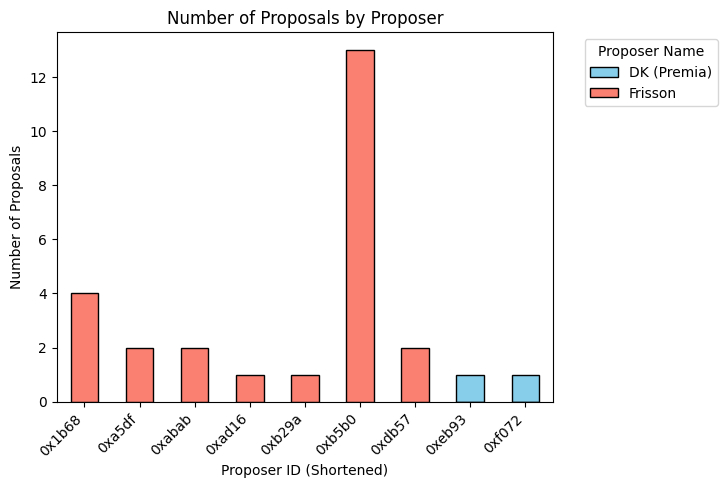

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("proposal_data.csv")

# Calculate the number of unique proposers
unique_proposers_count = df['proposer_address'].nunique()

print(f'The number of unique proposers are: {unique_proposers_count}')

# Group by proposer_id and count the number of proposals by each proposer
proposer_counts = df.groupby('proposer_address')['proposer_name'].value_counts().unstack(fill_value=0)

# Shorten the proposer IDs (for example, by taking the first few characters)
proposer_counts.index = proposer_counts.index.str[:6]  # Take the first 6 characters

# Plot a bar chart
plt.figure(figsize=(10, 6))
proposer_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')
plt.title('Number of Proposals by Proposer')
plt.xlabel('Proposer ID (Shortened)')
plt.ylabel('Number of Proposals')
plt.legend(title='Proposer Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Check for missing names and label with proposer IDs
# for idx, col in enumerate(proposer_counts.columns):
#     if pd.isna(col[1]):
#         plt.text(idx, 0, col[0], ha='center', va='bottom', rotation=45, color='black', fontsize=8)

plt.show()


Estimated direct/indirect  votes for each proposal

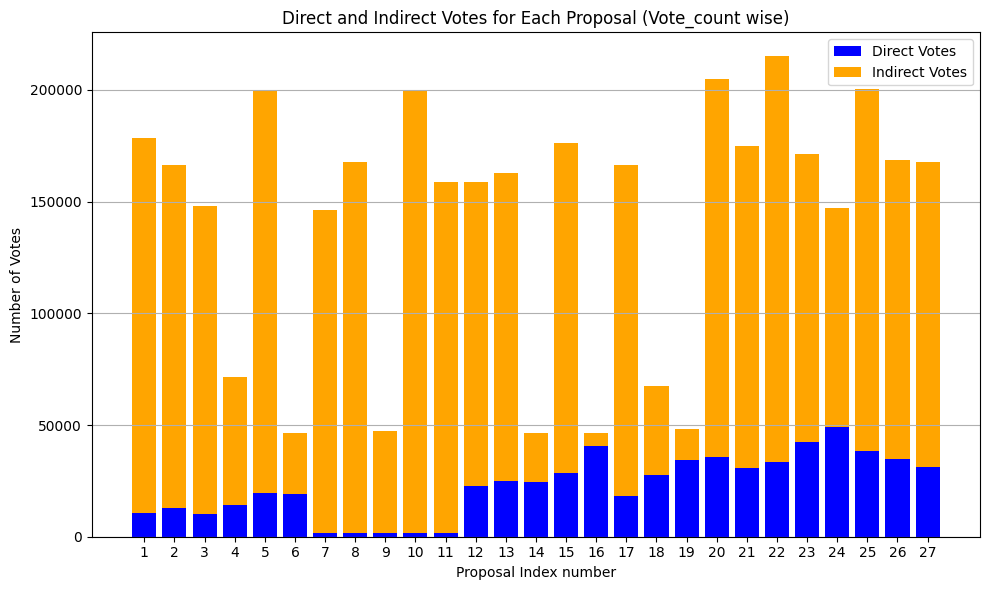

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the voter_data table from CSV
df_proposal = pd.read_csv("proposal_data.csv")

# Read the delegates table from CSV
voter_data = pd.read_csv("merged_datas/delegator_voter_data.csv")

# Group the data by proposal ID and sum the delegators count
proposal_delegators_sum = voter_data.groupby('proposal_id')['delegatorsCount'].sum().reset_index()

# Extract direct votes and calculate indirect votes
direct_votes = df_proposal['total_votes']
indirect_votes = proposal_delegators_sum['delegatorsCount'] - direct_votes

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(df_proposal.index+1, direct_votes, label='Direct Votes', color='blue')
plt.bar(df_proposal.index+1, indirect_votes, bottom=direct_votes, label='Indirect Votes', color='orange')

plt.xlabel('Proposal Index number')
plt.ylabel('Number of Votes')
plt.title('Direct and Indirect Votes for Each Proposal (Vote_count wise)')
plt.xticks(df_proposal.index+1, rotation=0)  # Set x-axis ticks to the index numbers
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


votes weight to the votes count

Total delegates weight for some proposal and actual vote weights given to votes

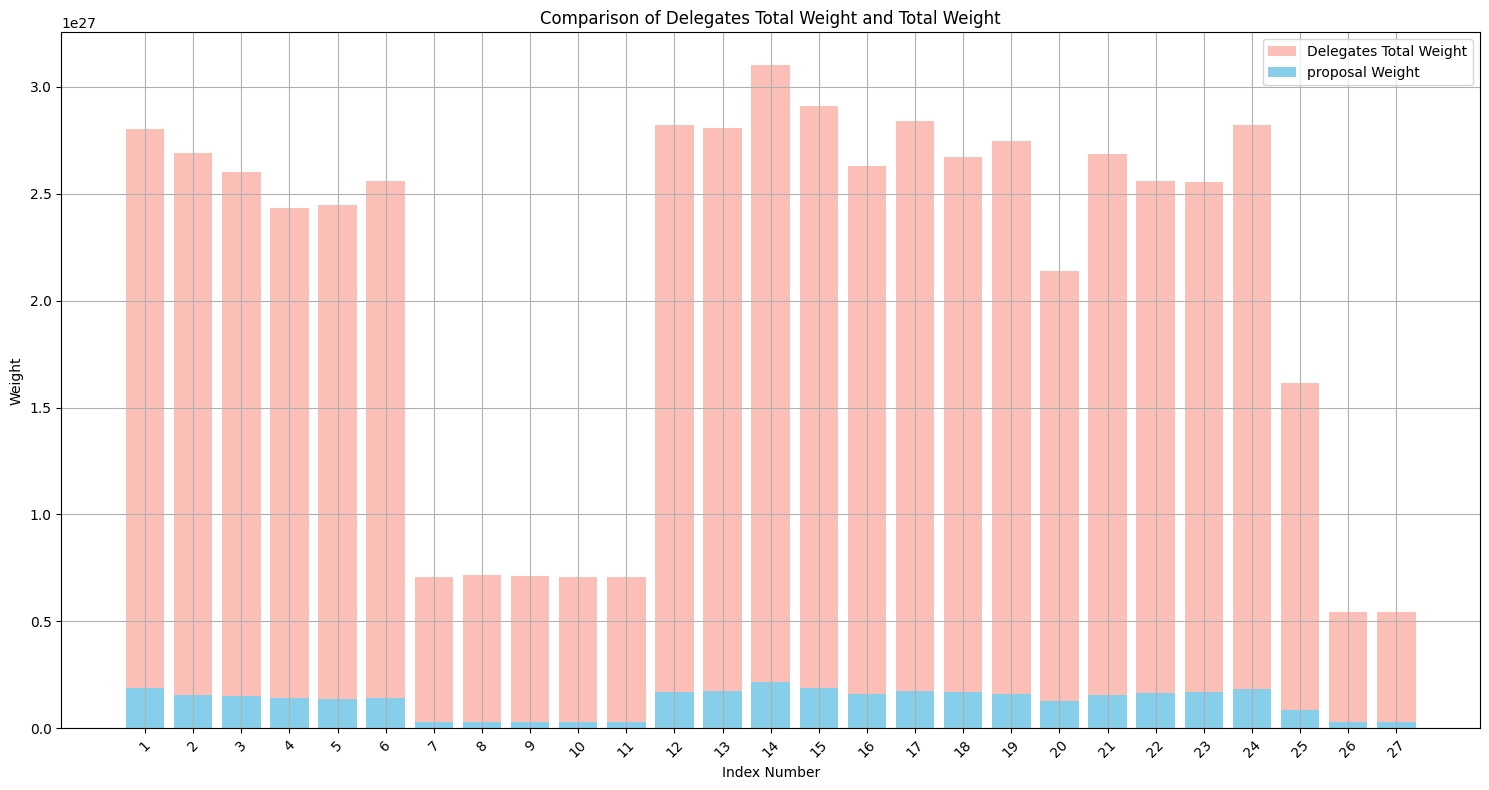

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the updated proposal data from the CSV file
proposal_data = pd.read_csv("proposal_data.csv")

# Extract the "delegates_total_weight" and "total_weight" columns
delegates_weight = proposal_data['delegates_weight']
total_weight = proposal_data['total_weight']
proposal_titles = proposal_data['title']

# Generate index numbers
index_numbers = range(1, len(proposal_titles) + 1)

# Plot a bar graph to compare the two columns using the proposal titles as x-axis labels
plt.figure(figsize=(15, 8))
plt.bar(index_numbers, delegates_weight, color='salmon', label='Delegates Total Weight',alpha=0.5)
plt.bar(index_numbers, total_weight, color='skyblue', label='proposal Weight ')
plt.xlabel('Index Number')
plt.ylabel('Weight')
plt.title('Comparison of Delegates Total Weight and Total Weight')
plt.legend()
plt.xticks(index_numbers, rotation=45)  # Set x-axis labels to proposal titles with rotation
plt.grid(True)
plt.tight_layout()
plt.show()


total direct and indirect voters for each proposal

3852094


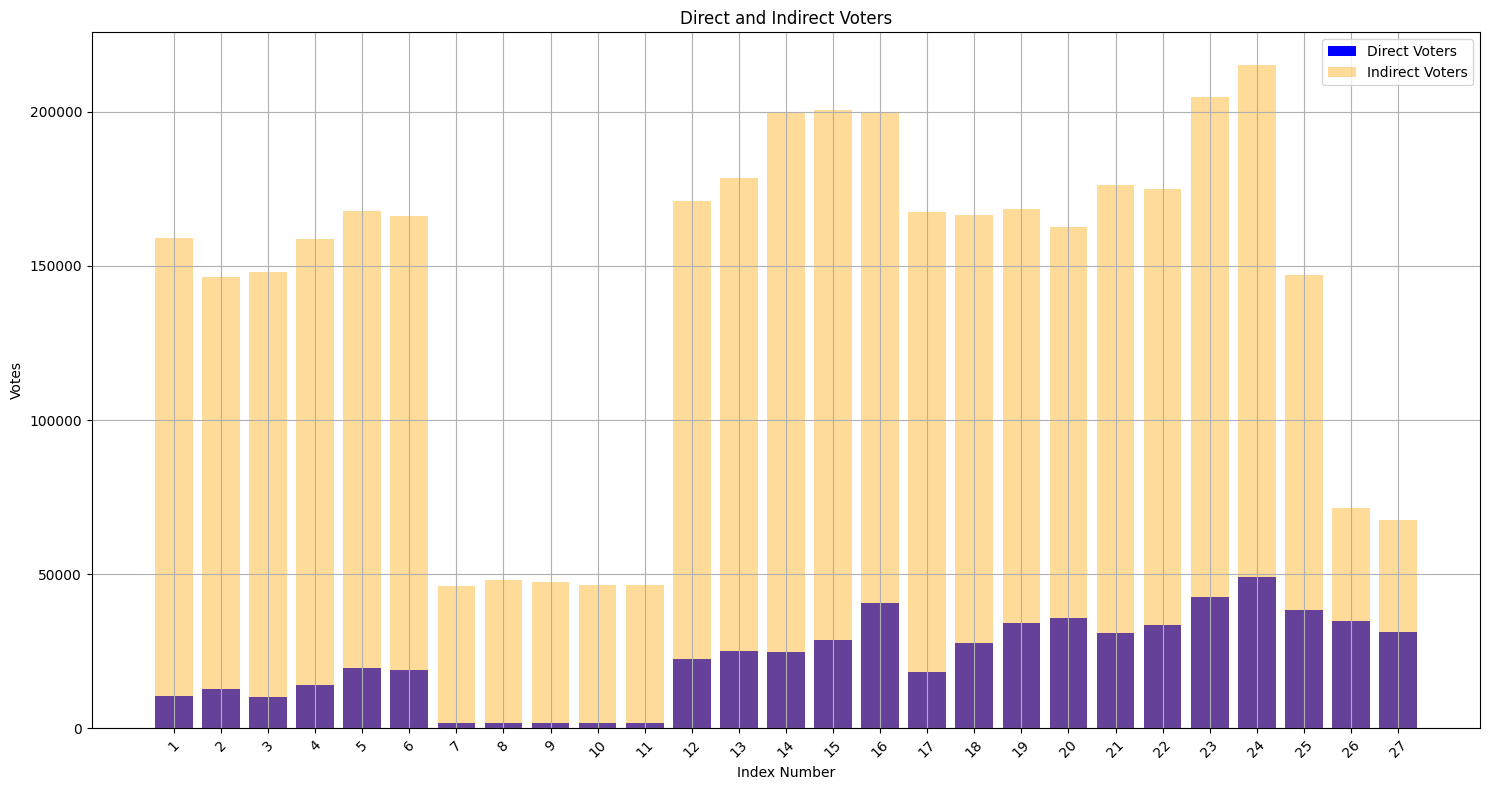

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the proposal data from the CSV file
proposal_data = pd.read_csv("proposal_data.csv")

# Extract direct voter and indirect voter data
direct_voters = proposal_data['total_votes']
indirect_voters = proposal_data['delegatorsCount']
print(indirect_voters.sum())
# Generate index numbers
index_numbers = range(1, len(proposal_data) + 1)

# Plot a bar graph to compare the two columns
plt.figure(figsize=(15, 8))
plt.bar(index_numbers, direct_voters, color='blue', label='Direct Voters',alpha=1)
plt.bar(index_numbers, indirect_voters, color='orange', label='Indirect Voters', alpha=0.4)  # Use alpha to make bars semi-transparent
plt.xlabel('Index Number')
plt.ylabel('Votes')
plt.title('Direct and Indirect Voters')
plt.legend()
plt.xticks(index_numbers, rotation=45)  # Set x-axis labels to proposal titles with rotation
plt.grid(True)
plt.tight_layout()
plt.show()


proposal participation analysis

In [51]:
import pandas as pd

# Read the voter delegates data into a DataFrame
voter_delegates_df = pd.read_csv("voter_delegate.csv")

# Group the voter delegates DataFrame by the proposal ID
grouped = voter_delegates_df.groupby('proposal_id')

# Initialize a dictionary to store the participation rates for each proposal
participation_rates = {}

# Iterate over each group
for proposal_id, group in grouped:
    # Calculate the total used power and total delegated power for the current proposal
    total_used_power = group['used_power'].sum()
    total_weight = group['weight'].sum() / 10**18  # Convert to ETH
    total_delegated_power = group['delegated_power'].sum()
    
    # Compute the participation rate and participation weight rate for the current proposal
    participation_rate = total_used_power / total_delegated_power
    participation_rate_weighted = total_weight / total_delegated_power
    
    # Store the participation rates in the dictionary
    participation_rates[proposal_id] = {'participation_rate': participation_rate,
                                        'participation_rate_weighted': participation_rate_weighted}

# Read the proposal data into a DataFrame
proposal_data_df = pd.read_csv("proposal_data.csv")

# Merge the proposal data DataFrame with the participation rates DataFrame on proposal ID
merged_df = pd.merge(proposal_data_df, pd.DataFrame(participation_rates.items(), columns=['proposal_id', 'participation_rates']), on='proposal_id', how='left')

# Save the modified proposal data back to a CSV file
merged_df.to_csv("proposal_data_with_participation_rates.csv", index=False)

# Display the modified proposal datam
merged_df


proposal_id  \
0   4690532029287719213453682307960881042643324849...   
1   2830090356734023798794617294737130432945514991...   
2   1107671773497072398208757645657478300097683076...   
3   4361630350632665628736261748733105982702173744...   
4   9888995132899270288965346198762182525785171847...   
5   5600205415524805590887310308655810313274884310...   
6   4899690353131167829722531917837942168855711094...   
7   6269372711941757139042689495856382466058496535...   
8   3552501304387071594622342050411823703923017237...   
9   5543426803745975083649736595805418534373093746...   
10  1383039874678416428701480968749901939536232216...   
11  7706969470218702744874587179056251579543283642...   
12  1071485005454172619218640858162769717959021520...   
13  1341346021224443996532576190359397506109193495...   
14  9253573141446607646574826069923456903377969523...   
15  4339452689891418965907083940091891085726910948...   
16  3404671125896180410748583247380612259410981609...   
17  1084136267365770870818185772381622679244596979...   
18  9408293140903699160728974832010019119322162704...   
19  4895790398933745249480796051428633430192468809...   
20  5278960523204658439322345461084507711919092088...   
21  7194117183571077845773593789468962932043168360...   
22  7054562996058631778062869275503254822217391219...   
23  7704996965996239340818230851893093924728584810...   
24  7990473303985333395933995396582398255848795629...   
25  1107931230849807738961292165514452032072868489...   
26  6037187917808110408264101227322128792786506741...   

                                                title  \
0   # AIP: ArbOS 20 “Atlas” - Arbitrum Support for...   
1   # Changes to the Constitution and the Security...   
2                # Long Term Incentives Pilot Program   
3   # Proposal [Non-Constitutional]: Establish the...   
4   # [UPDATED] Experimental Delegates Incentive S...   
5   # [Updated] Proposal to Establish the Arbitrum...   
6   # [Updated] Proposal to Establish the Arbitrum...   
7           # Experimental Delegates Incentive System   
8   # [UPDATED] Proposal to Establish the Arbitrum...   
9   # [UPDATED] Proposal to Establish the Arbitrum...   
10  # Proposal to Establish the Arbitrum Research ...   
11                            # AIP: ArbOS Version 11   
12  # Empowering Early Contributors: The community...   
13                                                 #    
14     # AIP 9: Arbitrum Short-term Incentive Program   
15  # AIP: Building the Future of NFTs: The Raribl...   
16   # AIP-7: Arbitrum One Governance Parameter Fixes   
17  # AIP 6: Security Council Elections Proposed I...   
18                                            # AIP 4   
19  # AIP - 3 [Non-Constitutional] Fund the Grants...   
20  # Arbitrum DAO Grants - Delegated Domain Alloc...   
21  # AIP-2: Activate support for account abstract...   
22  # AIP-1.1 - Lockup, Budget, Transparency [UPDA...   
23          # AIP-1.2 - Foundation and DAO Governance   
24           # AIP-1.1 - Lockup, Budget, Transparency   
25                                        # Arcubtang   
26                                          # art dra   

                                        governance_id  for_vote_count  \
0   eip155:42161:0xf07ded9dc292157749b6fd268e37df6...            7430   
1   eip155:42161:0xf07ded9dc292157749b6fd268e37df6...            9297   
2   eip155:42161:0x789fc99093b09ad01c34dc7251d0c89...            8878   
3   eip155:42161:0x789fc99093b09ad01c34dc7251d0c89...           10418   
4   eip155:42161:0x789fc99093b09ad01c34dc7251d0c89...           15368   
5   eip155:42161:0x789fc99093b09ad01c34dc7251d0c89...           12404   
6   eip155:42161:0xf07ded9dc292157749b6fd268e37df6...             642   
7   eip155:42161:0xf07ded9dc292157749b6fd268e37df6...             776   
8   eip155:42161:0x789fc99093b09ad01c34dc7251d0c89...            1283   
9   eip155:42161:0xf07ded9dc292157749b6fd268e37df6...            1189   
10  eip155:42161:0xf07ded9dc292157749b6fd268e